# New coders, where are you? - Best markets to advertise programming courses

`category: exploratory data analysis, statistics fundamentals`

Let's assume we work for an e-learning company which offers programming courses.<br/>
Learners can access these courses by paying a **monthly fee of $59**.<br/>
Our main courses are on **web** and **mobile development**, but we also cover **data science**, **games development** and a few more.

### Project goal
- Our goal in this project is to find **the two best markets** to advertise our products in.

More precisely, we'd like to answer the following questions:

> *Where are the new coders concentrated?*

> *How much are they willing to spend, on average?*

### Results summary

Very shortly, our analysis results are:
- The United States are the first best market by far;
- Canada and India are potentially good choices as second best market, but no conclusive evidence has been found.<br/> 
Different approaches are suggested in the conclusions;
- It may be a good idea to advertise our courses on the **Code Newbie** and/or **Javascript Jabber** podcasts in the US.

### The freeCodeCamp survey

In order to answer the business questions, we could organize a survey, but that is surely a costly and time-consuming approach.<br/> 
Instead, we could try and use a ready dataset. This is much faster and cheaper, although we don't have control over the features of the dataset.

We're going to  analyse a dataset containing the answers to a **survey run by freeCodeCamp**.<br/>
[freeCodeCamp](https://en.wikipedia.org/wiki/FreeCodeCamp) is a non-profit, free e-learning platform that offers courses mainly on web development. It was founded by Quincy Larson in 2014.<br/>
Since 2016, they run every year a survey aimed at understanding how new coders are learning to code, who they are, from where they come and so on. In other words, the dataset we're going to use covers both the demographic and the technical domain.<br/>
Because freeCodeCamp runs also a [popular Medium publication](https://www.freecodecamp.org/news/), their survey have been taken by people with all kinds of interests in development (not just web).<br/> 
Furthermore, they've all been coding for less than five years, a potentially ideal target for our courses.

Our dataset contains the results of the **[2017 freeCodeCamp New Coder Survey](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/)**.

### The dataset

The dataset can be found and downloaded from the [freeCodeCamp GitHub page](https://github.com/freeCodeCamp/2017-new-coder-survey).<br/>
Actually, the repository has three datasets, two with raw data and one which has been cleaned by the freeCodeCamp (fCC) team.
<br/> We're going to analyse the cleaned dataset: `2017-fCC-New-Coders-Survey-Data.csv`. It can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data).

The raw datasets can be downloaded from the [raw data](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data) folder in the repository.<br/> 
**Important note**: the headers of these two csv files contain **the actual questions of the survey**.

Let's read the cleaned dataset into a dataframe:

In [1]:
import os
import pandas as pd

# os-indipendent local path to the dataset
path_to_data = os.path.join(os.curdir, 'datasets', '2017-fCC-New-Coders-Survey-Data.csv')

survey = pd.read_csv(path_to_data, dtype={'CodeEventOther': object, 'JobInterestOther': object}) 

### Project libraries and plot settings

Let's load the remaining libraries needed for the project and let's set some parameters for the plots:

In [2]:
# os and pandas already imported in the previous cell

import matplotlib.pyplot as plt
import missingno as msno  # a little library for visualizing missing data nicely
import numpy as np
import seaborn as sns

In [3]:
# general settings for the plots
sns.set_style('darkgrid')          # seaborn style (darkgrid, white grid, dark, white and ticks)
plt.style.use('seaborn-darkgrid')  # pyplot style
plt.rc('axes', titlesize=18)       # fontsize of the axes title
plt.rc('axes', labelsize=14)       # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)      # fontsize of the tick labels
plt.rc('ytick', labelsize=14)      # fontsize of the tick labels
plt.rc('legend', fontsize=14)      # legend fontsize
plt.rc('font', size=14)            # controls default text sizes

# use the next line for displaying the available styles
# plt.style.available

## Getting to know the dataset

Here is a preview of the dataset, although it has so many features that we have to find a better to way understand its content.

In [4]:
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
survey.shape

(18175, 136)

18175 people took the survey, although they didn't actually answer to 136 questions.<br/>
In the cleaned dataset, the possible answers to a multiple choice question were disaggregated; therefore, each answer corresponds to a column in the dataset.<br/>
As an example:

In [6]:
survey.iloc[:4, 79:96]

,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each column refers to a podcast (Change Log, Code Newbie etc.) which the respondent possibly listens to. A `Nan` can possibly mean two things: an actually missing value, or simply an option left blank to say `I don't listen to this podcast`. The same applies to lots of other groups of features.<br/>
`1` is used as a `True` across all the dataset.

## - "Missing" data and features of interest


With the [missingno library](https://github.com/ResidentMario/missingno), we are equipped with some nice funtions to visualize missing values in a dataframe. We now use its barplot function, keeping in mind what we have just observed regarding the meaning of a Nan in our dataset. These graphs will also be used to **identify the features to use for our project goal**.

On the y axis, there's a scale from 0 to 1, with 1 meaning "no values missing" and 0 "all values missing".<br/>
The upper x axis labels represent the count of non-null values.

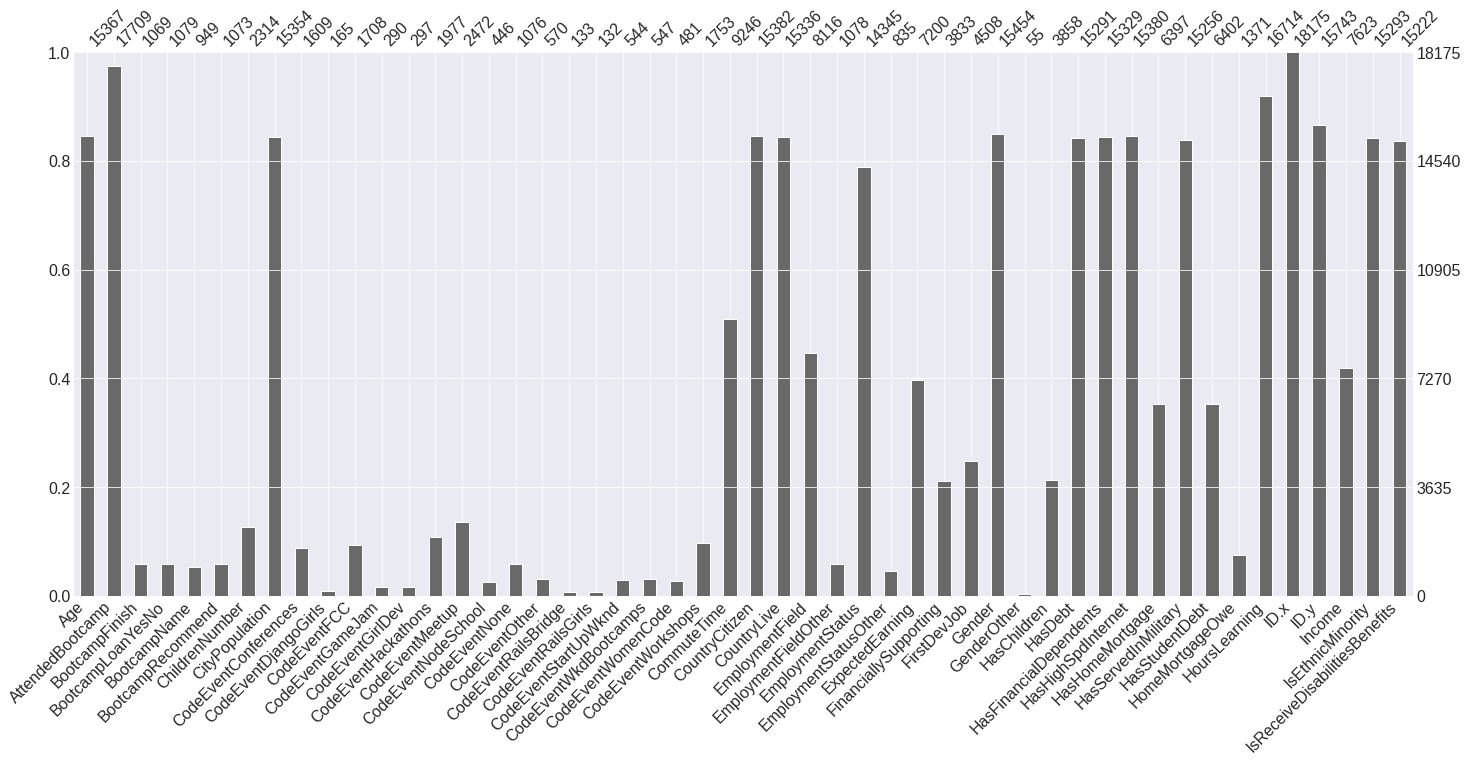

In [7]:
fig, ax = plt.subplots()

ax = msno.bar(survey.iloc[:, :50])
plt.show()

We see that a high fraction of respondents declared if they attended a coding bootcamp or not (`AttendedBootcamp` feature) and lots of them also gave fCC information about their country of origin (`CountryCitizen`) and the country were they lived at the moment when they took the survey (`CountryLive`).<br/>
These are interesting information for our business questions.

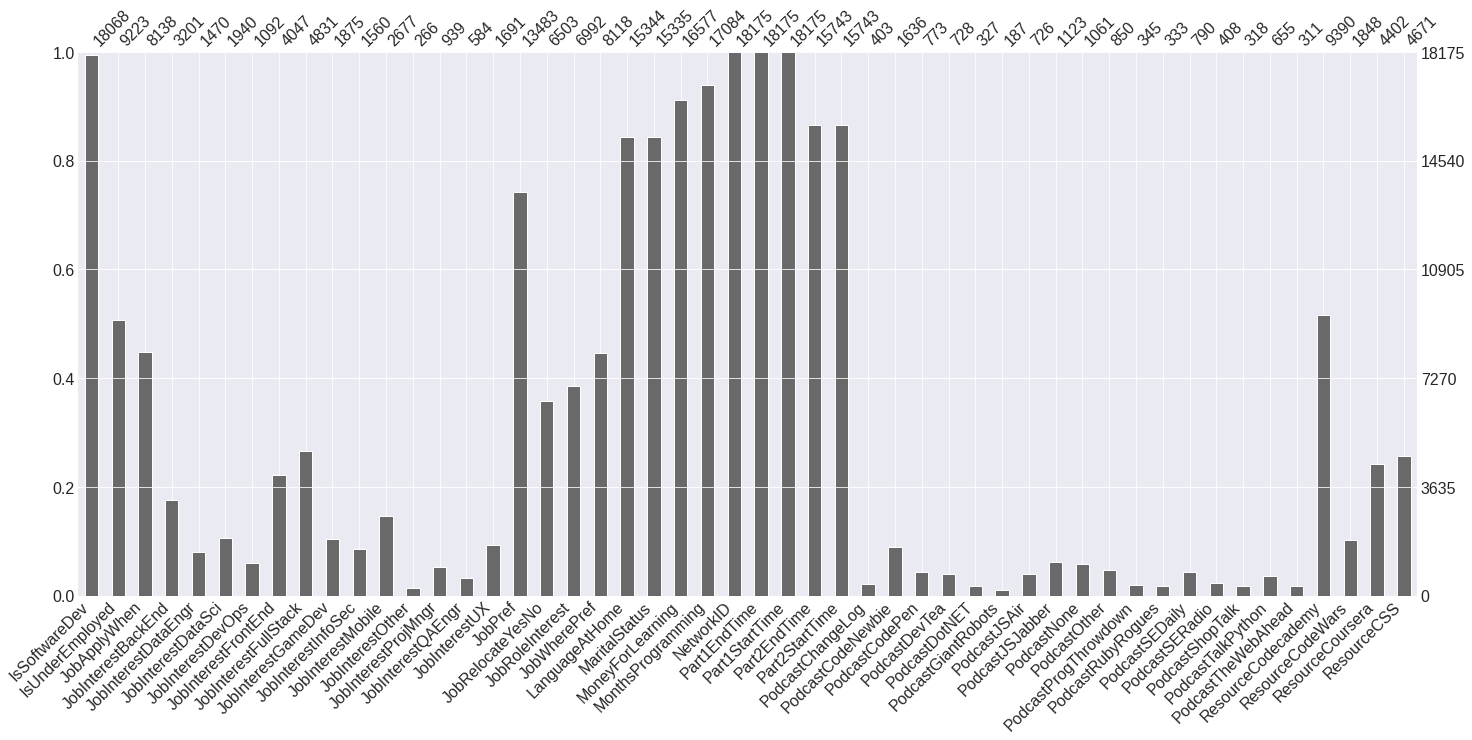

In [8]:
fig, ax = plt.subplots()

ax = msno.bar(survey.iloc[:, 50:100])
plt.show()

Here, the interesting features are:

- `JobRoleInterest`, which corresponds to the question:
        "In which job role(s) are you interested?" 
 
(we didn't find the actual question, but it seems reasonable from the answers)

- `MoneyForLearning`, which corresponds to the question: 
        "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"
        
- `MonthsProgramming`, which corresponds to the question: 
        "About how many months have you been programming for?"
        
These last two features can be used to estimate how much a new coder is willing to spend each month.

Finally, all the columns `Podcast...` are potentially interesting: we may advertise our courses on the most successful podcasts, if there's any.
        
        

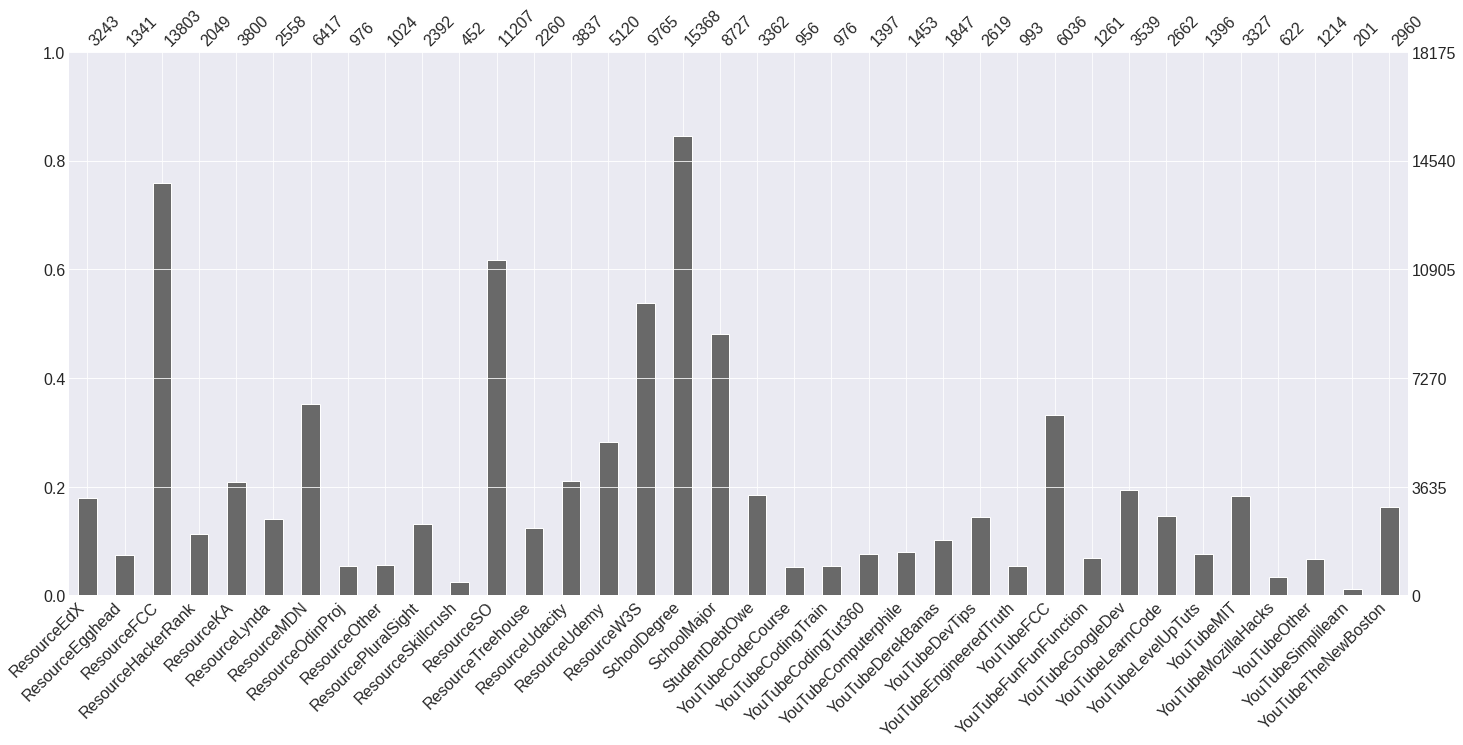

In [9]:
fig, ax = plt.subplots()

ax = msno.bar(survey.iloc[:, 100:])
plt.show()

No interesting features are present in this last chunk of columns, at least at the level of depth our analysis is going to be.

## Is the sample representative?

Before we start the analysis phase, we must consider whether the sample is representative of the population we're interested in.

We roughly define the **population** as all the new coders who are mainly interested in learning web/mobile development, but also other programming domains.

Let's explore the `JobRoleInterest` column as a proxy for the interests of the respondents.

In [10]:
freq_table = survey.iloc[:, 68].value_counts(normalize=True, dropna=True) * 100

print(freq_table[freq_table > 0.3])

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

After a glace at the answers, we already have some hints: 
- a consistent fraction of coders declares interest in **web development** of some sort (be it full-stack, front-end, back-end etc.);
- fewer coders seem to be interested in **mobile development**;
- also a few other interests emerge: data science, product manager, game development, data engineer, devOps, system administrator and so forth;
- some respondents declared an **interest in more than one domain**.

Because of the aggregated answers, it's clearer to summarize them with a pie-chart: 

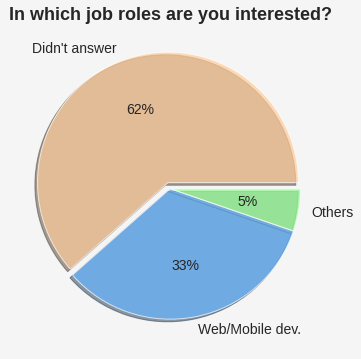

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

# data:
which_interests = survey['JobRoleInterest'].str.contains(r'[Ww]eb|[Mm]obile').value_counts(dropna=False)

# plot:
which_interests.plot.pie(ax=ax, 
                         labels=['Didn\'t answer', "Web/Mobile dev.", 'Others'], 
                         explode=[.05, 0, 0], 
                         wedgeprops={'alpha':0.7},
                         colors=['#ffcc99','#66b3ff','#99ff99'],
                         shadow=True,
                         autopct='%.0f%%')
ax.set_title('In which job roles are you interested?', weight='bold')
ax.set_ylabel('')
fig.set_facecolor('#F5F5F5')
# ax.set_aspect(aspect=0.7)  # set the aspect ratio so that height = aspect * width


plt.show()

We see that 62% of respondents didn't declare any job role interest.<br/>
The remaining 38% is divided among those who are interested in web/mobile development and those, the minority, who are interested in other programming areas.

**The missing information creates a representativeness issue**. We tried to find some information in the `Employment` related columns, but nothing useful emerged.<br/>
Because we don't know if those people are part of our population of interest, **we'll continue our analysis dropping their rows from the dataframe**. 

Anyway, those who responded can probably be considered a representative sample of our reference population because of their dominant interest in web/mobile development.

In [12]:
# from 18175 to 6992 rows
survey = survey.dropna(axis=0, subset=['JobRoleInterest']).copy()

In the next cell, we're going to create a new column with the list of job role interests.<br/> 
Then, we'll plot two graphs which summarize the interests of the remaining respondents.

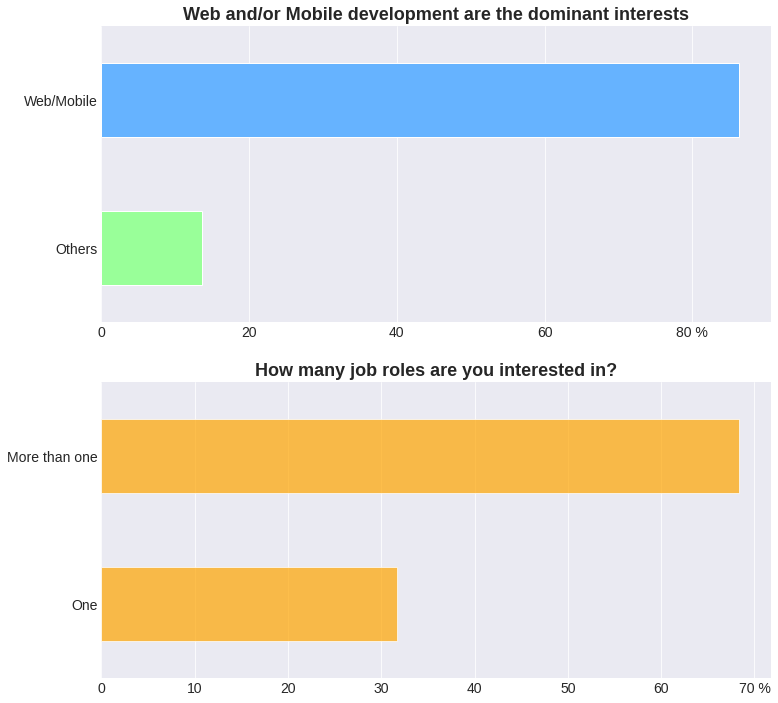

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

####################
### upper figure ###
####################
# data:
interests = survey['JobRoleInterest'].str.contains(r'[Ww]eb|[Mm]obile').value_counts(normalize=True) * 100

# plot:
interests.plot.barh(ax=ax1, color=['#66b3ff','#99ff99'], alpha=1)
ax1.set_title('Web and/or Mobile development are the dominant interests', weight='bold')
ax1.set_yticklabels(['Web/Mobile', 'Others'])
ax1.invert_yaxis()
ax1.set_xticks([0,20,40,60,80])
ax1.set_xticklabels(['0', '20', '40', '60'] + ['80 %'])
ax1.grid(b=False, axis='y')

####################
### lower figure ###
####################
# data:
survey['JobRoleInterest_list_clean'] = survey['JobRoleInterest'].str.split(', ').apply(
    lambda lis: [role.strip() for role in lis])
how_many_interests = survey['JobRoleInterest_list_clean'].apply(lambda lis: len(lis)) == 1

# plot:
(how_many_interests.value_counts(normalize=True) * 100).plot.barh(ax=ax2, color='orange', alpha=0.7)
ax2.set_title('How many job roles are you interested in?', weight='bold')
ax2.set_yticklabels(['More than one', 'One'])
ax2.set_xticks(range(0, 80, 10))
ax2.set_xticklabels(['0'] + [str(n) for n in range(10, 70, 10)] + ['70 %'])
ax2.invert_yaxis()
ax2.grid(b=False, axis='y')

plt.show()

In the last barplot, we see that almost 70% of the 6992 remaining respondents are not interested in just one programming domain. This is actually good news, since these coders newbie may decide to buy more than one of our programming courses.

## Data analysis

### New coders locations

The `CountryLive` feature is what we'll analyse first, because it contains a snapshot of where the respondents lived when they took the survey.<br/>
Through it, we'll start to answer our first question.<br/>
The `CountryCitizen` feature is less interesting for our purposes.

In [14]:
# how many didn't declare their country?
survey['CountryLive'].isnull().sum()

154

It's a small fraction of the respondents. We'll drop them from the dataframe:

In [15]:
survey = survey.dropna(axis=0, subset=['CountryLive']).copy()

# also, rename some countries with long names
survey['CountryLive'] = survey['CountryLive'].replace({'United States of America': 'USA',
                                                       'United Kingdom': 'UK'})

Let's see where the respondents live, both in absolute and relative frequecy:

In [16]:
# data:
abs_freq = survey['CountryLive'].value_counts(dropna=False)
rel_freq = survey['CountryLive'].value_counts(normalize=True, dropna=False)

abs_freq = abs_freq[abs_freq > 70]
rel_freq = round(rel_freq[rel_freq > 0.01] * 100, 1)

print('New coders live in...\n')

new_coders_loc = pd.concat([abs_freq, rel_freq], axis=1)
new_coders_loc.columns = ['No. of coders', '%']
print(new_coders_loc)

New coders live in...

           No. of coders     %
USA                 3125  45.7
India                528   7.7
UK                   315   4.6
Canada               260   3.8
Poland               131   1.9
Brazil               129   1.9
Germany              125   1.8
Australia            112   1.6
Russia               102   1.5
Ukraine               89   1.3
Nigeria               84   1.2
Spain                 77   1.1
France                75   1.1
Romania               71   1.0


We'll represent the previous data with a bar plot:

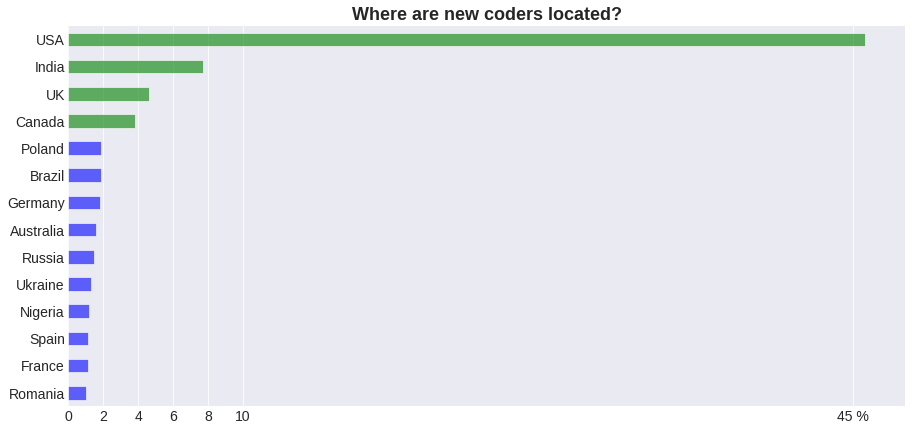

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))

# plot:
rel_freq.plot.barh(ax=ax, color=['g']*4 + ['b']*13, alpha=0.6)

ax.set_title('Where are new coders located?', weight='bold', fontsize=18)
ticks = [0, 2, 4, 6, 8, 10, 45]
ax.set_xticks(ticks)
ax.set_xticklabels([str(x) for x in ticks[:-1]] + ['45 %'])
ax.invert_yaxis()
ax.set_xlabel('')
ax.grid(b=False, axis='y')

plt.show()

**United States** has the largest share of respondents by far: more than 45%.<br/>
The next top three countries are highlighted with a green bar, with **India** as the second largest market.<br/>
We observe two facts: 
- our courses are in English, and all of the top four countries have English as their official language;
- finding out the two largest market is not enough to state they are the two best markets for advertise, because an important factor is the financial availability of their customers.

Because of these two observations, our next step will be to **limit ourselves to USA, India, UK and Canada** and to analyse the **average money spent for learning** in each of these countries.

### New coders average expense for learning

In [18]:
# selecting the top 4 countries
top_4_countries = ['USA', 'India', 'UK', 'Canada']
survey = survey[survey['CountryLive'].isin(top_4_countries)].copy()

As we anticipated  in the - **"Missing values" and features of interest** - paragraph, we're going to use the `MoneyForLearning` and `MonthsProgramming` features to evaluate a **proxy** for how much the respondents are willing to spend on learning each month.

In [19]:
# to avoid division by 0
survey['MonthsProgramming'] = survey['MonthsProgramming'].apply(lambda x: 1 if x == 0 else x)

# creating a new column with how much was spent per month by the respondents
survey['MoneyPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

# drop rows with null values from the dataset
survey.dropna(axis=0, subset=['MoneyPerMonth'], inplace=True)

print(f'The dataset now has {survey.shape[0]} rows')

The dataset now has 3915 rows


What are the mean, median and mode of the `MoneyPerMonth` column?

In [20]:
mean = survey.groupby('CountryLive').agg(np.mean)['MoneyPerMonth'].apply(round).sort_values(ascending=False)
median = survey.groupby('CountryLive').agg(np.median)['MoneyPerMonth'].sort_values(ascending=False)
mode = survey.groupby('CountryLive').agg(pd.Series.mode)['MoneyPerMonth'].sort_values(ascending=False)

money_per_month = pd.concat([mean, median, mode], axis=1)
money_per_month.columns = ['mean', 'median', 'mode']

print('Average monthly financial availability in the top 4 countries (US dollars):\n')
print(money_per_month)

Average monthly financial availability in the top 4 countries (US dollars):

        mean    median  mode
USA      228  3.333333   0.0
India    135  0.000000   0.0
Canada   114  0.000000   0.0
UK        46  0.000000   0.0


We see that respondents from **USA** spent \$228 per month on mean, again the largest by far.<br/>
It's a bit surprising that indian learners seem to be willing to spend more than canadian and UK learners: by looking at the [GDP per capita](https://www.worldometers.info/gdp/gdp-per-capita/) we would probably expect the opposite.<br/>

Furthermore, the median and the mode are practically all zero or close to zero: this results make us think about a **very skewed distribution** (lots of values concentrated around zero) and also about **very large ouliers**. We have to investigate more. Let's plot the histogram and boxplot of the values to confirm/discard our intuition.

### - Dealing with outliers

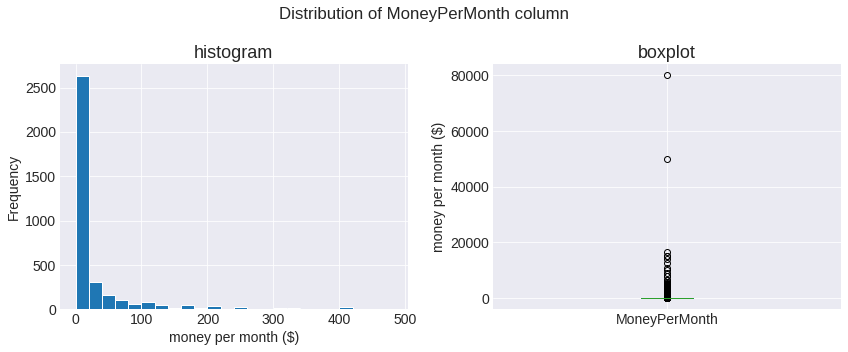

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Distribution of MoneyPerMonth column')

# left histogram
money_bins = list(range(0, 500, 20))  # custom bins
survey['MoneyPerMonth'].plot.hist(ax=ax1, bins=money_bins)
ax1.set_title('histogram')
ax1.set_xlabel('money per month ($)')

# right boxplot
survey['MoneyPerMonth'].plot.box(ax=ax2)
ax2.set_title('boxplot')
ax2.set_ylabel('money per month ($)')

plt.tight_layout()
plt.show()

Our intuition was correct: 
- from the histrogram, we see that the distribution is concentrated around \\$0 (most learners used free or very cheap resources). Note that we cut off the values greater than \$500 for clarity.
- form the boxplot, we actually see two extreme outliers at \\$50000 and \\$80000.

Let's deal with the latter first, which is easy.

In [22]:
survey[survey['MoneyPerMonth'] > 40000][['CountryLive', 'MoneyPerMonth','AttendedBootcamp',
                                         'BootcampFinish', 
                                         'BootcampLoanYesNo',
                                         'BootcampName',
                                         'BootcampRecommend',
                                         'MonthsProgramming']]

,CountryLive,MoneyPerMonth,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,MonthsProgramming
2478,USA,50000.0,1.0,0.0,1.0,NaN,1.0,2.0
14024,USA,80000.0,0.0,NaN,NaN,NaN,NaN,1.0


The first respondent attended a bootcamp, which can explain the \$50000 expense, while the second didn't. Could it be that he misunderstood the question and included the university tuition? We don't have any way to be sure.<br/>
We'll classify these two respondents as outliers and drop both from our dataset.

In [23]:
survey = survey[survey['MoneyPerMonth'] < 20000]

Now we'll deepen our exploration with four boxplots of the monthly expense, one for each country:

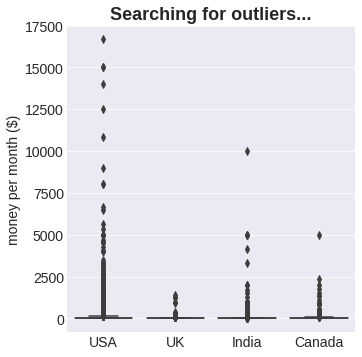

In [24]:
# plot:
facet_grid = sns.catplot(x='CountryLive', y='MoneyPerMonth', 
                         kind='box',
                         data=survey)

ax = facet_grid.ax
fig = facet_grid.fig
ax.set_title('Searching for outliers...', weight='bold')
ax.set_xlabel('')
ax.set_ylabel('money per month ($)')

plt.show()

We'll treat each country separately. For all of them, anyway, we'll try to spot outliers as values that "look off the distribution", and then analyse them directly to see if they're meaningful or suspicious.

### India

Values larger than **\$2500** per month appear separated from the rest of the distribution:

In [25]:
# potential outliers for India
india_out = survey[(survey['CountryLive'] == 'India') &
                   (survey['MoneyPerMonth'] > 2500)]

india_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest_list_clean,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[User Experience Designer, Mobile Developer, P...",5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,"[Information Security, Full-Stack Web Develope...",3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[User Experience Designer, Back-End Web Develo...",5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,"[Back-End Web Developer, Full-Stack Web Develo...",5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Mobile Developer],10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,"[Full-Stack Web Developer, Data Scientist]",4166.666667


These data are suspicious, because the respondents didn't attend a bootcamp, which could have explained the money spent for learning.<br/>
Actually, respondent `1755` declared to have used Udacity, whose courses are really expensive.<br/>
Anyway, we miss information to understand if these data are right or not, so we'll consider them outliers because they're separated from the other values.

In [26]:
# drop outliers for India
survey = survey.drop(india_out.index)

### USA

For the US, the values larger than **\$6000** look off:

In [27]:
# potential outliers for USA
usa_out = survey[(survey['CountryLive'] == 'USA') & (survey['MoneyPerMonth'] > 6000)]

usa_out[['AttendedBootcamp', 'MoneyPerMonth', 'MonthsProgramming']]

,AttendedBootcamp,MoneyPerMonth,MonthsProgramming
718,1.0,8000.000000,1.0
1222,1.0,6500.000000,2.0
3184,1.0,9000.000000,1.0
3930,0.0,10833.333333,6.0
6805,1.0,15000.000000,1.0
7198,0.0,14000.000000,5.0
7505,1.0,6666.666667,3.0
9778,1.0,8000.000000,1.0
16650,0.0,16666.666667,12.0
16997,0.0,12500.000000,1.0


Six respondents who spent more than $6000 attended a bootcamp, which can explain the numbers. Each of them has been programming for less than 4 months, though, so the monthly expense is not meaningful (most probably, they've paid the whole fee for the camp and won't spend anyhing in the next months). <br/>
The other five didn't attend any bootcamp, and again it's difficult to justify how they could've spent so much money.

Again, we'll consider them outliers and drop all of them from the dataset.

In [28]:
# drop outliers for USA
survey = survey.drop(usa_out.index)

## Canada

Looking at the boxplots, we easily spot a potential outlier at about **\$5000**.

In [29]:
# potential outlier for Canada
canada_out = survey[(survey['CountryLive'] == 'Canada') &
                     (survey['MoneyPerMonth'] > 4000)]

canada_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest_list_clean,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[Mobile Developer, Full-Stack Web Developer, D...",5000.0


The person attended the `Bloc.io` bootcamp, so this is probably real data, but still it's not realistic as a regular monthly expense (he probably paid once for the whole bootcamp). For our kind of customers, it can be considered an outlier.

In [30]:
# drop outlier for Canada
survey = survey.drop(canada_out.index)

Let's see the distributions after outliers removal:

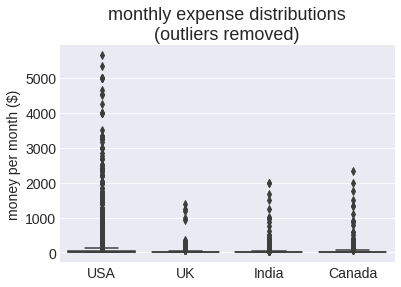

In [31]:
fig, ax = plt.subplots()

ax = sns.boxplot(x='CountryLive', y='MoneyPerMonth', 
                 data=survey)

ax.set_title('monthly expense distributions\n(outliers removed)')
ax.set_ylabel('money per month ($)')
ax.set_xlabel('')

plt.show()

Of course the distributions are still squashed close to zero (we removed a few extreme high-end outliers), so the mode and the median are not going to change appreciably. Nonethless, we now believe the mean is more sensible.

In [32]:
mean = survey.groupby('CountryLive')['MoneyPerMonth'].mean()
mean.sort_values(ascending=False).apply(round)

CountryLive
USA       143
Canada     93
India      66
UK         46
Name: MoneyPerMonth, dtype: int64

## Best two markets to advertise our courses

**USA** are without any doubt **the first best market**: they encompass 45% of the respondents and they are probably willing to invest much more in learning courses than those of the other countries. 

For the **second best market**, the situation is less clear-cut. We can neglect the **UK** because their mean monthly expense is less than our monthly fee ($59), but **there are no real elements to choose Canada over India or viceversa**.<br/>
In fact, canadian are willing to spend more than indians but their market (3.8\%) is smaller than India's (7.7\%).

We could face this unclear results with several approaches:
- Focus on the biggest market, the **USA**;
- Split the allocated budget for advertising in three countries: something like **70\% for USA and 15\% for Canada and India, each**;
- Send the results to the marketing team and let them take the decision based on their domain knowledge. 

### What about advertising during a podcast?

Because our dataset contains information about which podcasts the coders followed, we may think about advertising our courses/products during one or more of these shows.

Let's wrangle the data a bit before producing a categorical plot with the info we need.

In [33]:
# isolating the data about podcasts and country
podcast = survey.iloc[:, survey.columns.str.contains(r'[Pp]odcast|CountryLive')].copy()

podcast.drop(columns=['PodcastNone'], inplace=True)
# dropping the rows where all podcasts are Nan
podcast_cols = podcast.columns[podcast.columns.str.contains(r'[Pp]odcast')]
podcast.dropna(axis=0, how='all', subset=podcast_cols, inplace=True)
podcast.reset_index(drop=True)

# producing a single column with a list of all podcasts and then
# explode the dataframe along that column
def podcast_list(row):
    pod_list = []
    for pod, follow in zip(row.index, row.values):
        if follow == 1:
            pod_list.append(pod[7:])
    
    return pod_list

podcast['podcast_list'] = podcast.apply(podcast_list, axis=1)
podcast = podcast.explode('podcast_list')

Now for the categorical plot:

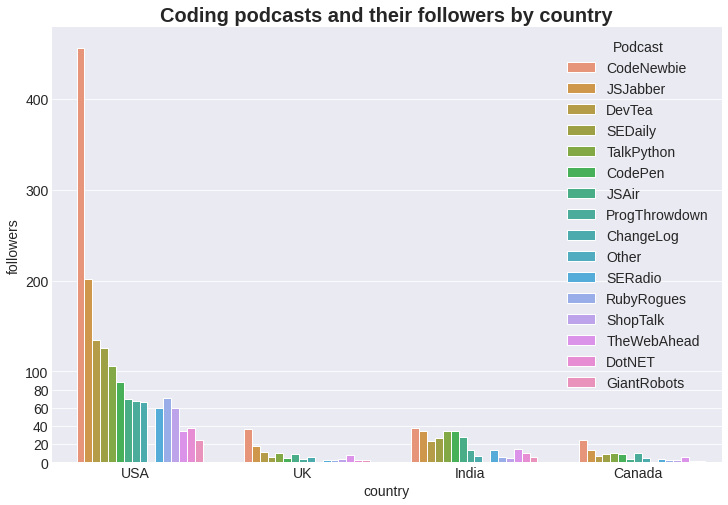

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

# defining the order of the columns in the plot
order = list(podcast.notnull().sum().sort_values(ascending=False)[1:].index)
order = [podcast[7:] for podcast in order]

# plot:
ax = sns.countplot(x='CountryLive', 
                   hue='podcast_list', 
                   data=podcast,
                   hue_order=order)

ax.set_xlabel('country')
ax.set_ylabel('followers')
ax.set_title('Coding podcasts and their followers by country', weight='bold', fontsize=20)
ax.legend(title='Podcast')
ticks = list(range(0, 120, 20)) + [200, 300, 400]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

plt.show()

- In the US, **Code Newbie** and **JS Jabber** are the most successful podcasts.<br/>
- In Canada, the numbers are so small that probably any conclusion is not statistically meaningful. Anyway, Code Newbie seems the most succesful podcast.<br/>
- In India, the results are more nuanced, since **Code Newbie**, **Js Jabber**, **Talk Python** and **Code Pen** have almost equal followers and they're not much more followed than **Developer Tea** and **Software Engineering Daily**.

# Conclusions

Our results for the best two markets to advertise our e-learning courses in can be summarised as follows:

1) The **USA** are the best market both by number of new coders (46\%) and by their willingness to spend for learning (about \$143 per month).

2) The second best market may be **Canada** or **India** but the evidences are not so conclusive. Canadian coders seem to have greater financial availability, but the indian market is larger. We highlight three possible approaches:

- Just focus on the biggest market, the **USA**;
- Split the allocated budget for advertising in three countries: something like **70\% for USA and 15\%   for Canada and India, each**;
- Send our results to the marketing team and let them take the decision based on their domain knowledge. 
    
3) We coul advertise our courses on the **Code Newbie** and/or **Javascript Jabber** podcasts in the US; if we choose India as the second market to invest in, also **Talk Python**, **Code Pen**, **Developer Tea** and **Software Engineering Daily** may be good choices (it also depends on which specific courses we want to advertise). 